## Plot differences in SPL between belugas and narwhals

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

### Load Data

In [56]:
# import beluga and narwhal sound pressure level (SPL) statistics
csv_dir = 'C:/Users/marie/Documents/PhD/Chapter_4/chap4_code/beluga_narwhal_classification/R/spreadsheets/SPL_difference/'

# Kong Oscar
kong_beluga_spec  = pd.read_csv(csv_dir + 'kong_beluga_spectral_data.csv')
kong_narwhal_spec = pd.read_csv(csv_dir + 'kong_narwhal_spectral_data.csv')

# Fisher Islands
fish_beluga_spec  = pd.read_csv(csv_dir + 'fish_beluga_spectral_data.csv')
fish_narwhal_spec = pd.read_csv(csv_dir + 'fish_narwhal_spectral_data.csv')

In [57]:
# remove the one noise beluga event
kong_beluga_spec = kong_beluga_spec.iloc[1:3,]

In [59]:
# join dataframes from both sites
beluga_spec  = pd.concat([kong_beluga_spec, fish_beluga_spec])
narwhal_spec = pd.concat([kong_narwhal_spec, fish_narwhal_spec])

In [60]:
## prepare dataframes to plot violin plots
df_narwhal = pd.melt(narwhal_spec, id_vars='evNum',\
                     value_vars=narwhal_spec.loc[:,'band_diff_17to23_dB':'band_diff_23to42_dB'],\
                     var_name='band', value_name='dB')

df_beluga = pd.melt(beluga_spec, id_vars='evNum',\
                    value_vars=beluga_spec.loc[:,'band_diff_17to23_dB':'band_diff_23to42_dB'],\
                    var_name='band', value_name='dB')

In [61]:
freq_array = np.arange(0,72000,281.25)
beluga_avSpec = beluga_spec.loc[:,'X1':'X256']
narwhal_avSpec = narwhal_spec.loc[:,'X1':'X256']

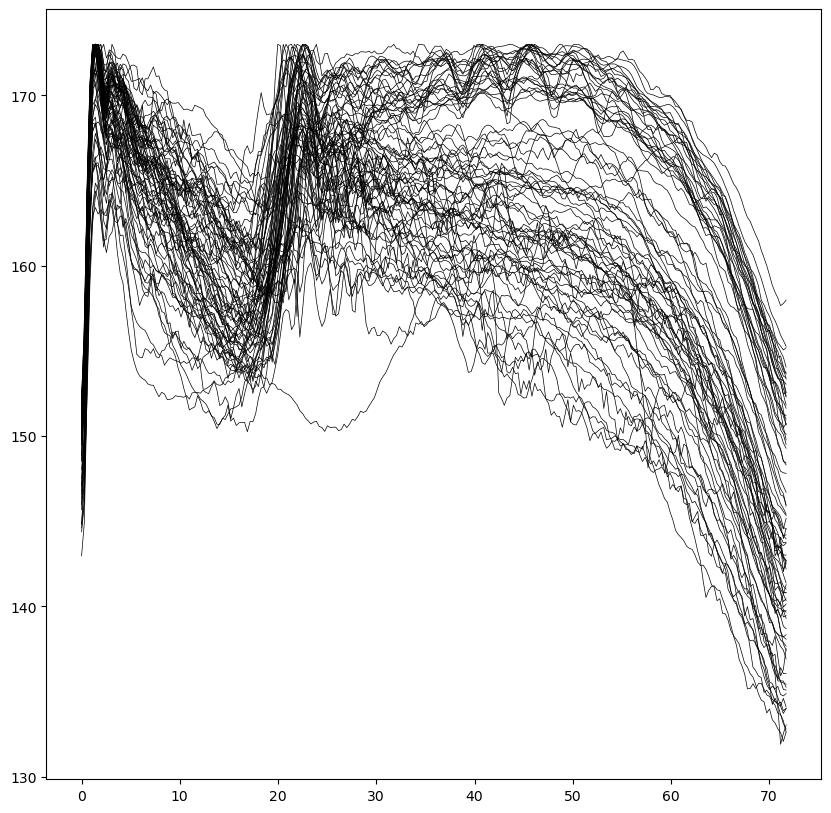

In [64]:
plt.rcParams['figure.figsize'] = (10,10)
for i in range(len(narwhal_avSpec.iloc[:,0])):
    plt.plot(freq_array/1000, narwhal_avSpec.iloc[i,:]+173,'k',linewidth=0.5)

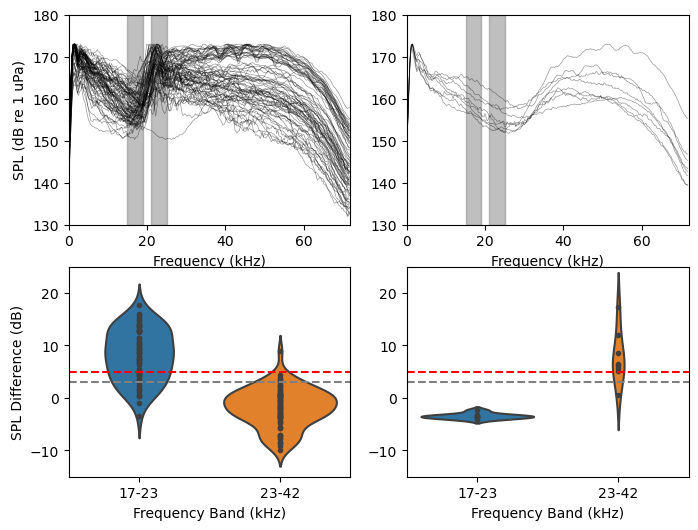

In [80]:
plt.rcParams['figure.figsize'] = (8,6)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

## top two plots: mean power spectra for each species
for i in range(len(narwhal_avSpec.iloc[:,0])):
    ax1.plot(freq_array/1000, narwhal_avSpec.iloc[i,:]+173,'k',alpha=0.4,linewidth=0.5)

for i in range(len(beluga_avSpec.iloc[:,0])):
    ax2.plot(freq_array/1000, beluga_avSpec.iloc[i,:]+173,'k',alpha=0.4,linewidth=0.5)

ax1.set_ylim(130,180)
ax2.set_ylim(130,180)
ax1.set_xlim(0,72)
ax2.set_xlim(0,72)
ax1.set_ylabel("SPL (dB re 1 uPa)")
ax1.set_xlabel("Frequency (kHz)")
ax2.set_xlabel("Frequency (kHz)")
    
## bottom two panels: SPL difference between two frequency bands
sns.violinplot(x=df_narwhal['band'],y=df_narwhal['dB'], inner="points",ax=ax3);
ax3.axhline(y = 5, color = 'r', linestyle = '--')
ax3.axhline(y = 3, color = 'gray', linestyle = '--')
ax3.set_ylim(-15,25)
ax3.set_xticklabels(["17-23", "23-42"])
ax3.set_ylabel("SPL Difference (dB)")
ax3.set_xlabel("Frequency Band (kHz)");

violin_bel = sns.violinplot(x=df_beluga['band'],y=df_beluga['dB'], inner="points",ax=ax4);
ax4.axhline(y = 5, color = 'r', linestyle = '--')
ax4.axhline(y = 3, color = 'gray', linestyle = '--')
ax4.set_ylim(-15,25)
ax4.set_xticklabels(["17-23", "23-42"])
ax4.set_ylabel("")
ax4.set_xlabel("Frequency Band (kHz)");

for ax in (ax1,ax2):
    ax.axvspan(15, 19, alpha=0.5, color='gray');
    ax.axvspan(21, 25, alpha=0.5, color='gray');
    
    # ax.axvspan(40, 44, alpha=0.5, color='tab:blue');


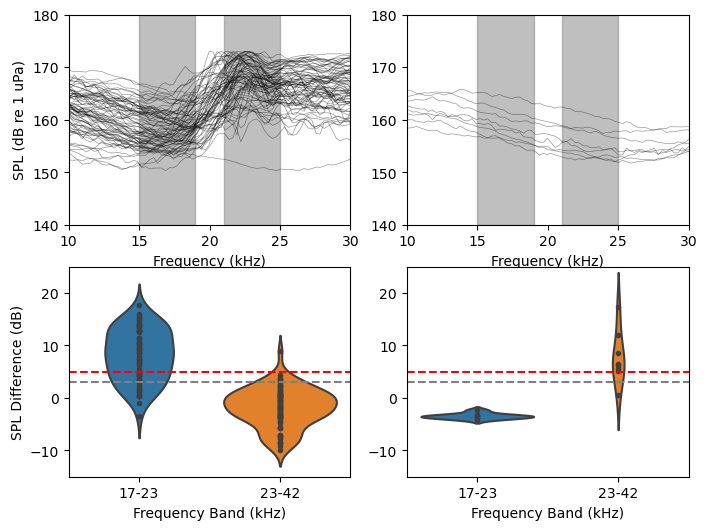

In [88]:
plt.rcParams['figure.figsize'] = (8,6)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

## top two plots: mean power spectra for each species
for i in range(len(narwhal_avSpec.iloc[:,0])):
    ax1.plot(freq_array/1000, narwhal_avSpec.iloc[i,:]+173,'k',alpha=0.4,linewidth=0.5)

for i in range(len(beluga_avSpec.iloc[:,0])):
    ax2.plot(freq_array/1000, beluga_avSpec.iloc[i,:]+173,'k',alpha=0.4,linewidth=0.5)

ax1.set_ylim(140,180)
ax2.set_ylim(140,180)
ax1.set_xlim(10,30)
ax2.set_xlim(10,30)
ax1.set_ylabel("SPL (dB re 1 uPa)")
ax1.set_xlabel("Frequency (kHz)")
ax2.set_xlabel("Frequency (kHz)")
    
## bottom two panels: SPL difference between two frequency bands
sns.violinplot(x=df_narwhal['band'],y=df_narwhal['dB'], inner="points",ax=ax3);
ax3.axhline(y = 5, color = 'r', linestyle = '--')
ax3.axhline(y = 3, color = 'gray', linestyle = '--')
ax3.set_ylim(-15,25)
ax3.set_xticklabels(["17-23", "23-42"])
ax3.set_ylabel("SPL Difference (dB)")
ax3.set_xlabel("Frequency Band (kHz)");

violin_bel = sns.violinplot(x=df_beluga['band'],y=df_beluga['dB'], inner="points",ax=ax4);
ax4.axhline(y = 5, color = 'r', linestyle = '--')
ax4.axhline(y = 3, color = 'gray', linestyle = '--')
ax4.set_ylim(-15,25)
ax4.set_xticklabels(["17-23", "23-42"])
ax4.set_ylabel("")
ax4.set_xlabel("Frequency Band (kHz)");

for ax in (ax1,ax2):
    ax.axvspan(15, 19, alpha=0.5, color='gray');
    ax.axvspan(21, 25, alpha=0.5, color='gray');
    
    # ax.axvspan(40, 44, alpha=0.5, color='tab:blue');
